# Actividad: Regresión Lineal 2

Por si alguna grafica, linea de codigo, o paso se ve distorsionado en el PDF, aquí está el link:

https://colab.research.google.com/drive/1OucxKJJIS1wCBG0OF-9Fxt51kaQA1xXn?usp=sharing

In [238]:
import numpy as np
import pandas as pd
from scipy.stats import t
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
df = pd.read_csv('/content/drive/MyDrive/7mo Semestre/Colab Notebooks/DataSources/breast_cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## 1.- Base de datos completa. No se observan valores faltantes. En caso de haberlos se realiza imputación simple

In [239]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [240]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [241]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [242]:
dummies_diagnosis = pd.get_dummies(df['diagnosis'], prefix = 'diagnosis')
dummies_diagnosis

,diagnosis_B,diagnosis_M
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
564,0,1
565,0,1
566,0,1
567,0,1


In [243]:
df = pd.concat([df, dummies_diagnosis], axis = 1)
df.drop('diagnosis', axis = 1, inplace = True)
df = df.rename(columns={'concave points_mean': 'concave_points_mean'})
df = df.rename(columns={'concave points_se': 'concave_points_se'})
df = df.rename(columns={'concave points_worst': 'concave_points_worst'})

## 2.- Mostrar que las variables regresoras son independientes. En caso de no serlo realizar el procedimiento correspondiente.

In [244]:
corr = df.corr()
corr

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_B,diagnosis_M
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,...,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866,-0.039769,0.039769
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029,0.730029
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185,0.415185
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636,0.742636
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984,0.708984
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560,0.358560
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534,0.596534
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360,0.696360
concave_points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614,0.776614
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499,0.330499


In [245]:
alta_corr = np.where((corr > 0.95) & (corr < 1))
baja_corr = np.where((corr < -0.95) & (corr > -1))
print('Alta correlación: ', alta_corr)
print('Baja correlación: ', baja_corr)

Alta correlación:  (array([ 1,  1,  1,  1,  3,  3,  3,  3,  4,  4,  4,  4,  4, 11, 11, 13, 14,
       21, 21, 21, 21, 21, 23, 23, 23, 23, 23, 24, 24, 24]), array([ 3,  4, 21, 23,  1,  4, 21, 23,  1,  3, 21, 23, 24, 13, 14, 11, 11,
        1,  3,  4, 23, 24,  1,  3,  4, 21, 24,  4, 21, 23]))
Baja correlación:  (array([], dtype=int64), array([], dtype=int64))


Como podemos observar, hay bastantes columnas que se encuentran correlacionadas, asi que las vamos a eliminar.

In [246]:
df.drop('perimeter_mean', axis = 1, inplace = True)
df.drop('area_mean', axis = 1, inplace = True)
df.drop('perimeter_worst', axis = 1, inplace = True)
df.drop('radius_se', axis = 1, inplace = True)
df.drop('radius_worst', axis = 1, inplace = True)

In [247]:
corr = df.corr()
alta_corr = np.where((corr > 0.95) & (corr < 1))
baja_corr = np.where((corr < -0.95) & (corr > -1))
print('Alta correlación: ', alta_corr)
print('Baja correlación: ', baja_corr)

Alta correlación:  (array([], dtype=int64), array([], dtype=int64))
Baja correlación:  (array([], dtype=int64), array([], dtype=int64))


Y las variables regresoras que terminaremos utilizando son las siguientes:

In [248]:
df.columns

Index(['id', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'concavity_mean', 'concave_points_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'texture_se', 'perimeter_se',
       'area_se', 'smoothness_se', 'compactness_se', 'concavity_se',
       'concave_points_se', 'symmetry_se', 'fractal_dimension_se',
       'texture_worst', 'area_worst', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'concave_points_worst', 'symmetry_worst',
       'fractal_dimension_worst', 'diagnosis_B', 'diagnosis_M'],
      dtype='object')

## 3.- Hipótesis nula de los coeficientes de regresión. Estadístico de prueba, distribución del estadístico de prueba.

Estandarizamos los datos:

In [249]:
scaler = StandardScaler()

df_estandar = scaler.fit_transform(df)

df_estandar = pd.DataFrame(df_estandar, columns = df.columns)

df_estandar

,id,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,texture_se,...,texture_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_B,diagnosis_M
0,-0.236405,1.097064,-2.073335,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,-0.565265,...,-1.359293,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,-1.297676,1.297676
1,-0.236403,1.829821,-0.353632,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,-0.876244,...,-0.369203,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,-1.297676,1.297676
2,0.431741,1.579888,0.456187,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,-0.780083,...,-0.023974,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,-1.297676,1.297676
3,0.432121,-0.768909,0.253732,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,-0.110409,...,0.133984,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,-1.297676,1.297676
4,0.432201,1.750297,-1.151816,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,-0.790244,...,-1.466770,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,-1.297676,1.297676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,-0.235732,2.110995,0.721473,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,0.071025,...,0.117700,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091,-1.297676,1.297676
565,-0.235730,1.704854,2.085134,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,2.260938,...,2.047399,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978,-1.297676,1.297676
566,-0.235727,0.702284,2.045574,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,-0.257371,...,1.374854,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409,-1.297676,1.297676
567,-0.235725,1.838341,2.336457,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,0.686088,...,2.237926,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635,-1.297676,1.297676


Entrenamiento:

In [250]:
entrenamiento, prueba = train_test_split(df_estandar, test_size=0.20, random_state=42)

In [251]:
df.columns

Index(['id', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'concavity_mean', 'concave_points_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'texture_se', 'perimeter_se',
       'area_se', 'smoothness_se', 'compactness_se', 'concavity_se',
       'concave_points_se', 'symmetry_se', 'fractal_dimension_se',
       'texture_worst', 'area_worst', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'concave_points_worst', 'symmetry_worst',
       'fractal_dimension_worst', 'diagnosis_B', 'diagnosis_M'],
      dtype='object')

In [252]:
modelo = smf.ols(formula = 'radius_mean~id+texture_mean+smoothness_mean+compactness_mean+concavity_mean+concave_points_mean+symmetry_mean+fractal_dimension_mean+texture_se+perimeter_se+area_se+smoothness_se+compactness_se+concavity_se+concave_points_se+symmetry_se+fractal_dimension_se+texture_worst+area_worst+smoothness_worst+compactness_worst+concavity_worst+concave_points_worst+symmetry_worst+fractal_dimension_worst+diagnosis_B', data = entrenamiento)

modelo = modelo.fit()

print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:            radius_mean   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     344.7
Date:                Wed, 06 Sep 2023   Prob (F-statistic):          1.50e-268
Time:                        06:33:44   Log-Likelihood:                 55.550
No. Observations:                 455   AIC:                            -57.10
Df Residuals:                     428   BIC:                             54.15
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

Nuestra $R^2$ es bastante buena. Si queremos simplificar el modelo, eliminamos las $\beta$ que su p-valor sea mayor a 0.05

## Para un 95% de confianza realiza un diagrama en donde se muestre la distribución del estadístico de prueba, la zona de aceptación y la zona de rechazo.

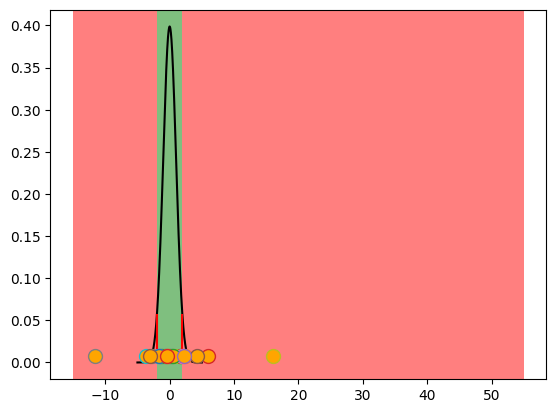

In [253]:
indice_columna = 0
dof = df_estandar.shape[0] - 1
alpha = 0.05
ntails = 2

tcrit = abs(stats.t.ppf(alpha/ntails, dof))

xs = np.linspace(-5,5,1000)

plt.plot(xs, stats.t.pdf(xs,dof), 'k')
plt.vlines([-tcrit, tcrit], 0.0, stats.t.pdf(tcrit,dof), colors='r')

for i in range(1, len(modelo.tvalues)):
    t = modelo.tvalues[i]
    plt.plot(t, 0.008, marker="o", markersize=10, markerfacecolor="orange")

plt.axvspan(-tcrit, tcrit, facecolor='green', alpha=0.5, label = 'Aceptación')
plt.axvspan(-15, -tcrit, facecolor='red', alpha=0.5, label = 'Rechazo')
plt.axvspan(tcrit, 55, facecolor='red', alpha=0.5)
plt.show()

Si observamos, hay muchos valores que se encuentran en la región de rechazo, así que esta prueba nos indica que aun quedan variables regresoras que podemos eliminar para hacer mas simple nuestro modelo.

## 4.- Hipótesis nula de la significancia del modelo (prueba F-Fisher). Menciona que distribución tiene el estadístico de prueba con qué número de grados de libertad. Para un 95% de confianza realiza un diagrama en donde se muestre la distribución del estadístico de prueba, la zona de aceptación y la zona de rechazo.

In [254]:
fTest = np.identity(len(modelo.params))
fTest = fTest[1:,:]
modelo.f_test(fTest)

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=344.692004902787, p=1.501640435420423e-268, df_denom=428, df_num=26>

Valor critico 1.4861716526654176


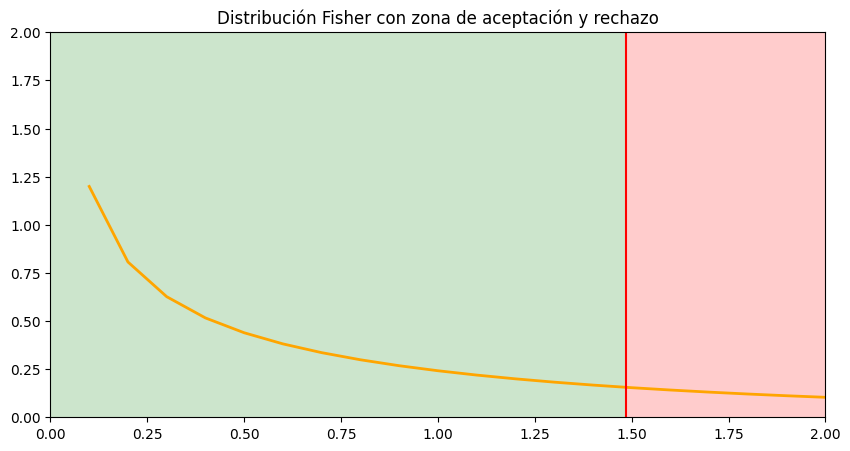

In [255]:
rand_f_samples = stats.f.rvs(dfn=30, dfd=424, size=100000)

plt.figure(figsize=(10, 5))

plt.plot(
    np.arange(0, 4, 0.1),
    stats.f.pdf(np.arange(0, 4, 0.1), dfn=1, dfd=453),
    "-",
    linewidth=2,
    color="orange",
)

plt.xlim(0, 2)
plt.ylim(0, 2)

plt.title("Distribución Fisher con zona de aceptación y rechazo")

critical_value = stats.f.ppf(q=1-.05, dfn=30, dfd=424)
print('Valor critico', critical_value)

plt.vlines([-critical_value, critical_value],0,4, colors='r', label = 'valores criticos')
plt.axvspan(-critical_value, critical_value, facecolor='green', alpha=0.2)
plt.axvspan(critical_value, 10, facecolor='red', alpha=0.2)


plt.show()

Si vemos nuestra F en el test de Fisher, nos da como resultado, $F=344.692004902787$, valor que entra en la región de rechazo (que la marca el valor critico = 1.4861716526654176) de la hipotesis nula, infiriendo que el modelo sí es significativo.

## 5.- Realiza un modelo de regresión hacia atrás (backward). Explica el criterio para ir eliminando variables del modelo.

Bueno, ahora sabemos que el modelo tiene espacio para mejorar, así que vamos a mejorar el modelo analizando el p-valor de nuestas variables regresoras, y si son mayores a 0.05, los eliminamos porque se acepta la hipotesis nula que implica que la variable es igual a cero.

In [256]:
modelo = smf.ols(formula = 'radius_mean~texture_mean+compactness_mean+concave_points_mean+fractal_dimension_mean+fractal_dimension_se+texture_worst+area_worst+smoothness_worst+fractal_dimension_worst+diagnosis_B', data = entrenamiento)

modelo = modelo.fit()

print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:            radius_mean   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     812.5
Date:                Wed, 06 Sep 2023   Prob (F-statistic):          3.46e-278
Time:                        06:33:45   Log-Likelihood:                 26.391
No. Observations:                 455   AIC:                            -30.78
Df Residuals:                     444   BIC:                             14.54
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

Empeoró ligeramente nuestra $R^2$, pero disminuimos considerablemente el numero de variables regresoras. Ahora este modelo nos dió otros p-valores que son mayores que 0.05, así que vamos a ver que tanto cambia el modelo si los eliminamos.

In [257]:
modelo = smf.ols(formula = 'radius_mean~texture_mean+compactness_mean+concave_points_mean+fractal_dimension_mean+texture_worst+area_worst+smoothness_worst', data = entrenamiento)

modelo = modelo.fit()

print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:            radius_mean   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     1133.
Date:                Wed, 06 Sep 2023   Prob (F-statistic):          6.33e-280
Time:                        06:33:45   Log-Likelihood:                 19.774
No. Observations:                 455   AIC:                            -23.55
Df Residuals:                     447   BIC:                             9.414
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0

Nuevamente, nuestra $R^2$ empeoró ligeramente, pero personalmente considero que es decremento minimo, en comparación al numero de variables al que se pudo minimizar gracias a este decremento. Y ya no quedan p-valores que se puedan eliminar.

Asi que vamos a hacer las predicciones con este modelo.

## 6.- Comparación entre datos reales y predicción. Análisis de los resultados.

In [258]:
y_pred = modelo.predict(prueba)
y_test = prueba["radius_mean"]

In [259]:
print("MAE = ", mean_absolute_error(y_test, y_pred))
print("MSE = ", mean_squared_error(y_test, y_pred))
print("R^2 = ", r2_score(y_test, y_pred))

MAE =  0.16672250002141548
MSE =  0.0468402226218193
R^2 =  0.9519550705600349


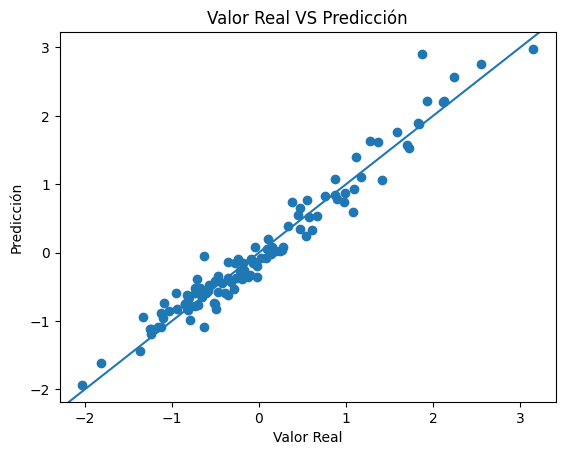

In [260]:
plt.scatter(y_test, y_pred)
plt.title("Valor Real VS Predicción")
plt.xlabel("Valor Real")
plt.ylabel("Predicción")
plt.axline([0, 0], [1, 1])
plt.show()

Como podemos ver nuestro modelo es bastante bueno porque mayormente se alinean los resultados verdaderos con las predicciones de manera lineal.

## Conclusión

Al darnos la libertad de analizar con diferentes pruebas la eficiencia del modelo, podemos elegir de una manera mas optima las variables que valen la pena eliminar para mejorar el modelo. Además, podemos simplificar el modelo y evitar que se sobreajuste al eliminar variables regresoras.